In [1]:
install.packages("MASS")
library("MASS")
install.packages("tidyverse")
library("tidyverse")
install.packages("caret")
library("caret")
install.packages("pROC")
library("pROC")

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'MASS'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\MASS\libs\x64\MASS.dll to C:\Users\2198K\Documents\R\win-library\3.6\MASS\libs\x64\MASS.dll: Permission denied"
Warning message:
"restored 'MASS'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpOgPIFQ\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpOgPIFQ\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\caret\libs\x64\caret.dll to C:\Users\2198K\Documents\R\win-library\3.6\caret\libs\x64\caret.dll: Permission denied"
Warning message:
"restored 'caret'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpOgPIFQ\downloaded_packages


Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'pROC' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'pROC'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\pROC\libs\x64\pROC.dll to C:\Users\2198K\Documents\R\win-library\3.6\pROC\libs\x64\pROC.dll: Permission denied"
Warning message:
"restored 'pROC'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpOgPIFQ\downloaded_packages


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




In [2]:
ionomics <- read.csv('geneva_x_raw_spec_as_int.csv',colClasses =c("NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA))
ionomics = ionomics[0:200,]

In [3]:
# Split the data into training (80%) and test set (20%)
set.seed(123)
training.samples <- ionomics[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data <- ionomics[training.samples, ]
test.data <- ionomics[-training.samples, ]

In [4]:
# Fit the model
model <- lda(spec_as_int~., data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model accuracy
mean(predictions$class==test.data$spec_as_int)
model

[1] 0.675

Call:
lda(spec_as_int ~ ., data = train.data)

Prior probabilities of groups:
      1       2       3       4       5       6       7       8 
0.05625 0.02500 0.14375 0.21250 0.01875 0.35000 0.13125 0.06250 

Group means:
        B11     Na23     Mg26     Al27      P31      S34      K39     Ca44
1  90.94427 133.9067 1391.795 17.89484 5355.609 2130.511 18665.93 4609.872
2  65.11287 182.0139 1627.407 20.46892 6065.449 2184.148 16191.51 4913.603
3  81.73199 336.8241 1732.418 23.29512 6226.500 2342.957 16355.16 9282.536
4 107.21473 276.4449 1714.237 22.28725 5543.940 2171.191 17461.62 5029.485
5 208.47778 412.9255 1487.338 30.53035 6871.144 2166.811 14542.06 3244.151
6 116.59345 196.5791 1546.119 18.89445 5702.859 2355.311 16480.37 5733.404
7 111.09929 168.9252 1633.358 14.25432 6373.155 2254.455 18883.19 3912.653
8  87.24701 145.8115 1172.501 21.28435 4948.603 1981.750 14371.40 3506.854
      Fe54     Mn55       Co59      Ni60      Cu63     Zn66       As75     Rb85
1 42.04223 175.5196 0.0

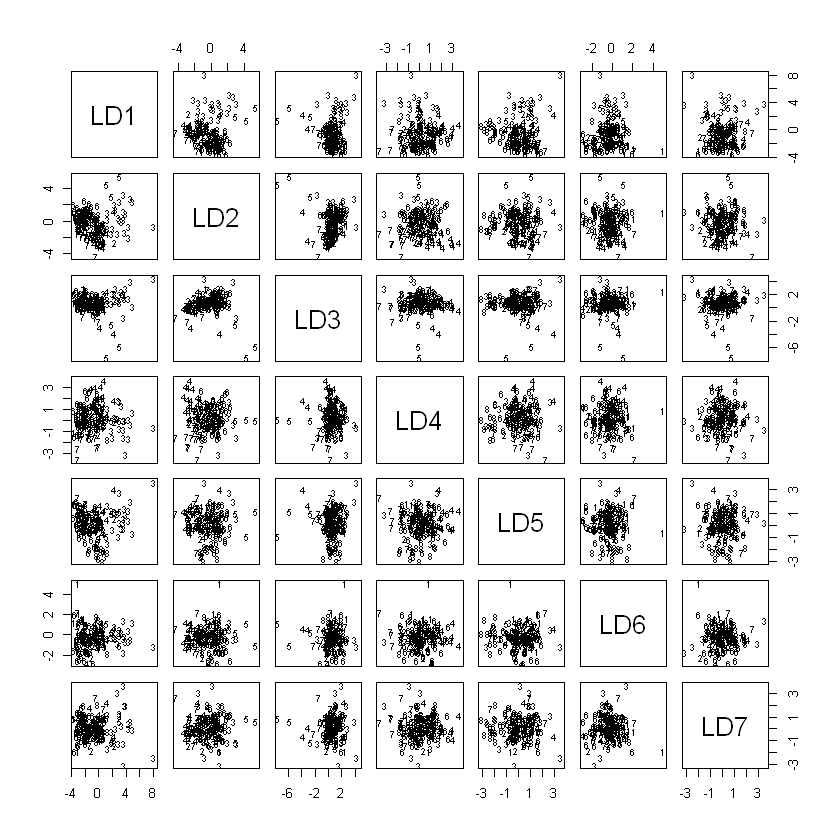

In [5]:
plot(model)

In [6]:
# Predicted classes
head(predictions$class, 6)
# Predicted probabilities of class memebership.
head(predictions$posterior, 6) 
# Linear discriminants
head(predictions$x, 3) 

[1] 6 6 4 4 4 6
Levels: 1 2 3 4 5 6 7 8

,1,2,3,4,5,6,7,8
2,0.0869990121,0.003108882,3.149865e-06,0.06588280,3.870662e-14,0.54981032,2.588732e-01,0.0353225855
4,0.0763338694,0.003546748,2.187137e-08,0.01275913,1.651140e-23,0.78436820,1.225599e-01,0.0004321644
5,0.0003412062,0.001500877,1.431832e-06,0.93607791,5.021310e-19,0.04912686,8.942227e-05,0.0128622886
15,0.0005135677,0.008439631,3.418062e-04,0.88198278,2.147278e-15,0.07964075,8.232006e-03,0.0208494569
16,0.0005156590,0.061180542,5.721791e-04,0.57785368,8.594526e-17,0.28735000,1.265154e-02,0.0598764001
24,0.0027876869,0.001056701,7.290123e-04,0.04327390,1.855841e-22,0.90208432,4.948513e-02,0.0005832490


,LD1,LD2,LD3,LD4,LD5,LD6,LD7
2,-0.9173733,0.1007945,-0.8682352,-0.7538904,-0.53949878,1.2114838,0.2187709
4,-2.1487137,-0.8586237,1.1281338,-0.4022925,-0.07724146,-0.1214462,-1.3441381
5,-0.2990818,-0.6537336,0.1774879,3.1481195,-1.50671028,0.1362236,-0.7269329


In [7]:
table <- table(Predicted=predictions$class, spec_as_int=test.data$spec_as_int)
print(confusionMatrix(table))

Confusion Matrix and Statistics

         spec_as_int
Predicted  1  2  3  4  5  6  7  8
        1  0  0  0  0  0  1  0  0
        2  0  0  0  0  0  0  0  0
        3  0  0  4  0  1  0  0  0
        4  1  2  0  5  0  1  3  0
        5  0  0  0  0  1  0  0  0
        6  2  0  1  1  0 13  0  0
        7  0  0  0  0  0  0  3  0
        8  0  0  0  0  0  0  0  1

Overall Statistics
                                          
               Accuracy : 0.675           
                 95% CI : (0.5087, 0.8143)
    No Information Rate : 0.375           
    P-Value [Acc > NIR] : 0.0001152       
                                          
                  Kappa : 0.5752          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity            0.0000     0.00   0.8000   0.8333   0.5000   0.8667
Specificity            0.9730     1.00   0.9714   0.7941   1

In [8]:
mn.net <- nnet::multinom(spec_as_int ~ ., train.data)
ionomics.predictions <- predict(mn.net, newdata=test.data, type="prob")
ionomics.predictions <- as.data.frame(ionomics.predictions)
auc <- multiclass.roc(test.data$spec_as_int, ionomics.predictions, percent=TRUE)
print(auc)

# weights:  168 (140 variable)
initial  value 332.710647 
iter  10 value 245.428044
iter  20 value 192.200404
iter  30 value 165.191731
iter  40 value 141.795843
iter  50 value 130.586789
iter  60 value 124.768542
iter  70 value 120.454747
iter  80 value 108.874564
iter  90 value 83.881801
iter 100 value 52.822180
final  value 52.822180 
stopped after 100 iterations

Call:
multiclass.roc.default(response = test.data$spec_as_int, predictor = ionomics.predictions,     percent = TRUE)

Data: multivariate predictor ionomics.predictions with 8 levels of test.data$spec_as_int: 1, 2, 3, 4, 5, 6, 7, 8.
Multi-class area under the curve: 84.28%


In [9]:
install.packages("klaR")
library(klaR) # for NaiveBayes

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'klaR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpOgPIFQ\downloaded_packages


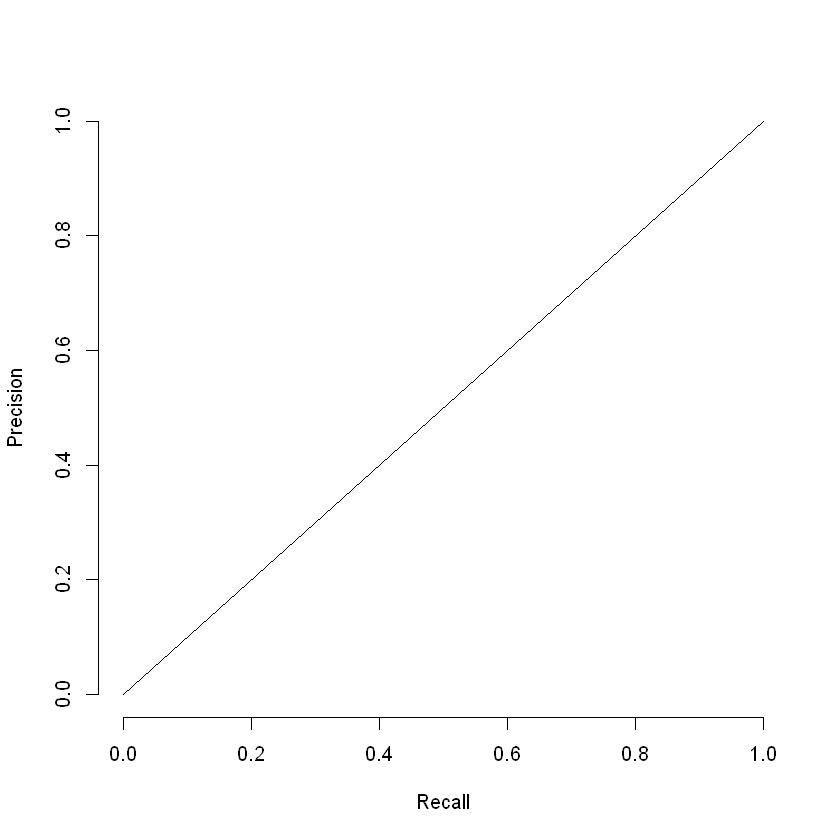

In [10]:
plot(x=NA, y=NA, xlim=c(0,1), ylim=c(0,1),
     ylab="Precision",
     xlab="Recall",
     bty='n')
colors <- c("red", "blue", "green")
aucs <- rep(NA, length(levels(ionomics$spec_as_int))) # store AUCs
for (i in seq_along(levels(ionomics$spec_as_int))) {
  cur.class <- levels(ionomics$spec_as_int)[i]
  binary.labels <- as.factor(train.data$spec_as_int == cur.class)
  # binarize the classifier you are using (NB is arbitrary)
  model <- NaiveBayes(binary.labels ~ ., data = train.data)
  pred <- predict(model, test.data, type='raw')
  score <- pred$posterior[, 'TRUE'] # posterior for  positive class
  test.labels <- test.data$spec_as_int == cur.class
  pred <- prediction(score, test.labels)
  perf <- performance(pred, "prec", "rec")
  roc.x <- unlist(perf@x.values)
  roc.y <- unlist(perf@y.values)
  lines(roc.y ~ roc.x, col = colors[i], lwd = 2)
  # store AUC
  auc <- performance(pred, "auc")
  auc <- unlist(slot(auc, "y.values"))
  aucs[i] <- auc
}
lines(x=c(0,1), c(0,1))